In [81]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, cross_validation, ensemble
%matplotlib inline

In [69]:
#在回归问题上，使用的数据集是scikit-learn自带的一个糖尿病病人的数据集。
def load_data_regression():
    diabetes = datasets.load_diabetes()
    return cross_validation.train_test_split(diabetes.data, diabetes.target, test_size = 0.25, random_state = 0)

In [70]:
#在分类问题中，使用的是scikit-learn自带的手写识别数据Digit Dataset
def load_data_classification():
    digits = datasets.load_digits()
    return cross_validation.train_test_split(digits.data, digits.target, test_size = 0.25, random_state = 0, stratify =digits.target)

In [71]:
#AdaBoostClassifier是scikit-learn提供的AdaBoost分类器
def test_AdaBoostClassifier(*data):
    x_train, x_test, y_train, y_test = data 
    clf = ensemble.AdaBoostClassifier(learning_rate = 0.1)
    clf.fit(x_train, y_train)
    estimators_num = len(clf.estimators_)
    X = range(1,estimators_num+1)
    #绘图
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(list(X), list(clf.staged_score(x_train, y_train)), label = "trian score")
    ax.plot(list(X), list(clf.staged_score(x_test, y_test)), label = "test score")
    ax.set_xlabel("estimators num")
    ax.set_ylabel("score")
    ax.legend(loc = "best")
    ax.set_title("AdaBoostClassifier with Decision Tree")
    plt.show()

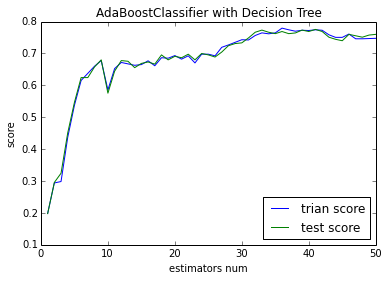

In [72]:
x_train, x_test, y_train, y_test = load_data_classification()
test_AdaBoostClassifier(x_train, x_test, y_train, y_test)

In [73]:
#考察不同类型的个体分类器的影响
def test_AdaBoostClassifier_base_classifier(*data):
    from sklearn.naive_bayes import GaussianNB
    x_train, x_test, y_train, y_test = data 
    clf = ensemble.AdaBoostClassifier(learning_rate = 0.1, base_estimator = GaussianNB())
    clf.fit(x_train, y_train)
    estimators_num = len(clf.estimators_)
    X = range(1,estimators_num+1)
    #绘图
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(list(X), list(clf.staged_score(x_train, y_train)), label = "trian score")
    ax.plot(list(X), list(clf.staged_score(x_test, y_test)), label = "test score")
    ax.set_xlabel("estimators num")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.0)
    ax.legend(loc = "best")
    ax.set_title("AdaBoostClassifier with Gaussian Naive Bayes")
    plt.show()

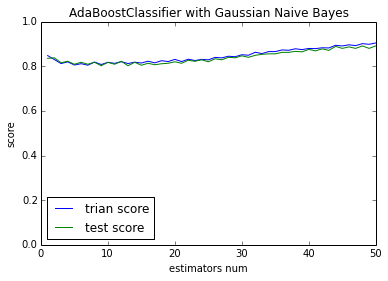

In [74]:
test_AdaBoostClassifier_base_classifier( x_train, x_test, y_train, y_test)

In [75]:
#考察学习率的影响
def test_AdaBoostClassifier_learning_rate(*data):
    x_train, x_test, y_train, y_test = data 
    learning_rates = np.linspace(0.01,1)
    train_score = []
    test_score = []
    for learning_rate in learning_rates:
        clf = ensemble.AdaBoostClassifier(learning_rate=learning_rate, n_estimators=500)
        clf.fit(x_train, y_train)
        train_score.append(clf.score(x_train, y_train))
        test_score.append(clf.score(x_test, y_test))
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(learning_rates, train_score, label = "train score")
    ax.plot(learning_rates, test_score, label = "test score")
    ax.set_xlabel("learning rate")
    ax.set_ylabel("score")
    ax.legend(loc = "best")
    ax.set_title("AdaBoostClassifier")
    plt.show()

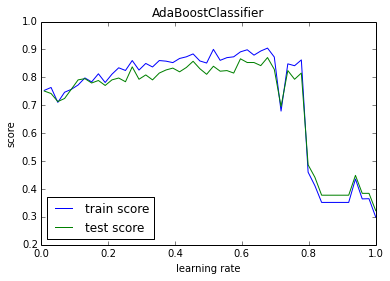

In [80]:
test_AdaBoostClassifier_learning_rate(x_train, x_test, y_train, y_test)

In [88]:
#考察algorithm的影响
def test_AdaBoostClassifier_algorithm(*data):
    x_train, x_test, y_train, y_test = data 
    algorithms = ["SAMME.R","SAMME"]
    learning_rates = [0.05, 0.1, 0.5, 0.9]
    train_score = []
    test_score = []
    fig = plt.figure()
    for i, learning_rate in enumerate(learning_rates):
        fig.suptitle("AdaBoostClassifier")
        for k , algorithm in enumerate(algorithms):
            clf = ensemble.AdaBoostClassifier(learning_rate= learning_rate, algorithm= algorithm)
            clf.fit(x_train, y_train)
            #绘图
            estimators_num = len(clf.estimators_)
            X = range(1, 1+estimators_num)
            ax = fig.add_subplot(2,2,i+1)
            ax.plot(list(X), list(clf.staged_score(x_train, y_train)), label = "%s: trian score"%algorithm)
            ax.plot(list(X),list(clf.staged_score(x_train, y_train)), label = "%s: test score"%algorithm)
            ax.set_xlabel("estimator num")
            ax.set_ylabel("score")
            #ax.legend(loc = "best")
            ax.set_title("learning rate: %s"%learning_rate)
            plt.show()  

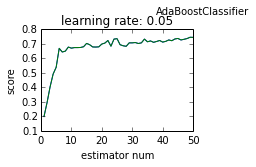

In [89]:
test_AdaBoostClassifier_algorithm(x_train, x_test, y_train, y_test)

In [102]:
#GradientBoostingClassifier是scikit-learn提供的梯度提升决策树
def test_GradientBoostingClassifier(*data):
    x_train, x_test, y_train, y_test = data
    clf = ensemble.GradientBoostingClassifier()
    clf.fit(x_train,y_train)
    print("trian score: %f"%clf.score(x_train,y_train))
    print("test score: %f"%clf.score(x_test, y_test))

In [103]:
test_GradientBoostingClassifier(x_train, x_test, y_train, y_test)

trian score: 1.000000
test score: 0.960000


In [104]:
#考察个体决策树的数量对GBDT预测性能的影响
def test_GradientBoostingClassifier_num(*data):
    x_train, x_test, y_train, y_test = data
    nums = np.arange(1,100,step = 2)
    train_score = []
    test_score = []
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    for num in nums:
        clf = ensemble.GradientBoostingClassifier(n_estimators= num)
        clf.fit(x_train, y_train)
        train_score.append(clf.score(x_train,y_train))
        test_score.append(clf.score(x_test,y_test))
    ax.plot(nums, train_score, label = "trian score")
    ax.plot(nums, test_score, label = "test score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc = "lower right")
    ax.set_ylim(0,1.05)
    plt.suptitle("GradientBoostingClassifier")
    plt.show()

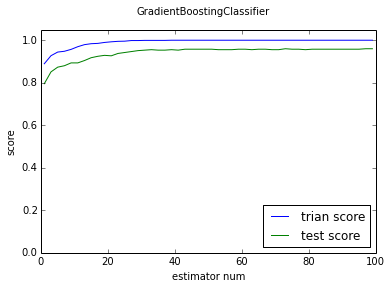

In [105]:
test_GradientBoostingClassifier_num(x_train, x_test, y_train, y_test)

In [106]:
# RandomForestClassifier是scikit-learn提供的随机森林分类器
def test_RandomForestClassifier(*data):
    x_train, x_test, y_train, y_test = data
    clf = ensemble.RandomForestClassifier()
    clf.fit(x_train,y_train)
    print("trian score: %f"%clf.score(x_train,y_train))
    print("test score: %f"%clf.score(x_test, y_test))

In [107]:
test_RandomForestClassifier(x_train, x_test, y_train, y_test)

trian score: 1.000000
test score: 0.946667


In [108]:
#考察森林中决策树的数量对RF预测性能的影响
def test_RandomForestClassifier_num(*data):
    x_train, x_test, y_train, y_test = data
    nums = np.arange(1,100,step = 2)
    train_score = []
    test_score = []
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    for num in nums:
        clf = ensemble.RandomForestClassifier(n_estimators= num)
        clf.fit(x_train, y_train)
        train_score.append(clf.score(x_train,y_train))
        test_score.append(clf.score(x_test,y_test))
    ax.plot(nums, train_score, label = "trian score")
    ax.plot(nums, test_score, label = "test score")
    ax.set_xlabel("estimator num")
    ax.set_ylabel("score")
    ax.legend(loc = "lower right")
    ax.set_ylim(0,1.05)
    plt.suptitle("RandomForestClassifier")
    plt.show()

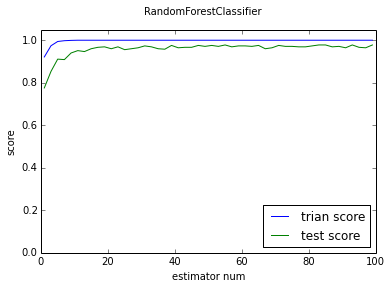

In [109]:
test_RandomForestClassifier_num(x_train, x_test, y_train, y_test)